# Creación de modelos de predicción

In [1]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv("df_dummie.csv")
df_encoded = pd.read_csv("df_encoded.csv")
df.head()

,accommodates,bathrooms,cleaning_fee,host_identity_verified,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds,price,...,cancellation_policy_strict,regions_Brooklyn,regions_Chicago,regions_LA Mains,regions_New York Mains,regions_Other,regions_Queens,regions_San Francisco,regions_Santa Clarita,regions_Washington
0,7,1.0,1,0,1,6,93.0,3.0,3.0,169.0,...,1,0,0,0,1,0,0,0,0,0
1,2,1.0,1,1,1,3,100.0,1.0,1.0,85.0,...,1,0,0,0,0,0,0,1,0,0
2,2,1.0,1,1,0,9,93.0,1.0,1.0,120.0,...,0,0,0,1,0,0,0,0,0,0
3,2,1.0,1,0,0,159,99.0,1.0,1.0,120.0,...,0,0,0,0,0,0,0,1,0,0
4,2,1.0,1,1,0,82,93.0,1.0,1.0,100.0,...,1,0,0,0,1,0,0,0,0,0


In [3]:
df.shape

(28877, 31)

In [4]:
df.columns

Index(['accommodates', 'bathrooms', 'cleaning_fee', 'host_identity_verified',
       'instant_bookable', 'number_of_reviews', 'review_scores_rating',
       'bedrooms', 'beds', 'price', 'host_response', 'amenities_ratio',
       'property_type_Condominium', 'property_type_Guesthouse',
       'property_type_House', 'property_type_Loft', 'property_type_Other',
       'property_type_Townhouse', 'room_type_Private room',
       'room_type_Shared room', 'cancellation_policy_moderate',
       'cancellation_policy_strict', 'regions_Brooklyn', 'regions_Chicago',
       'regions_LA Mains', 'regions_New York Mains', 'regions_Other',
       'regions_Queens', 'regions_San Francisco', 'regions_Santa Clarita',
       'regions_Washington'],
      dtype='object')

In [4]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

(0, 1)

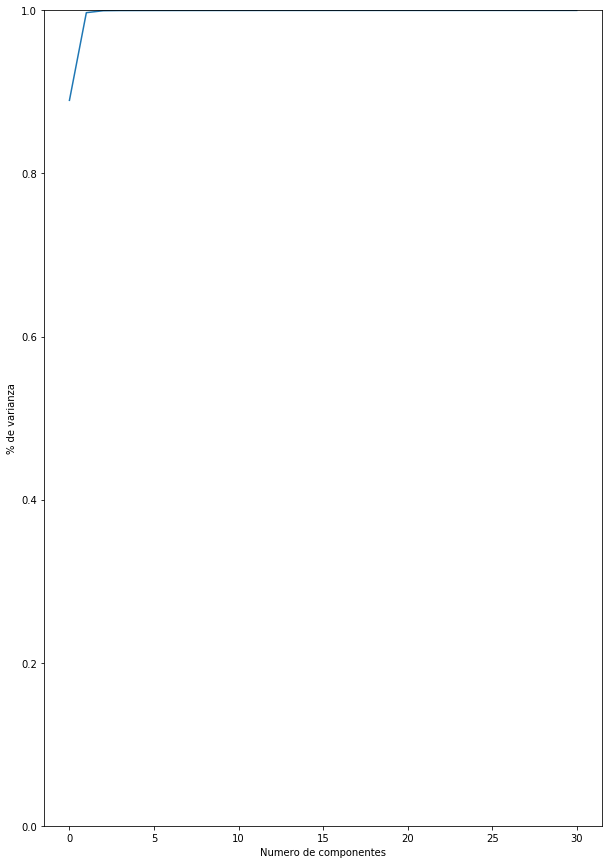

In [6]:
plt.figure(figsize=(10,15))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Numero de componentes')
plt.ylabel('% de varianza')
plt.ylim([0,1])
#Al parecer puedo reducir mucho mi df y mantener el % de varianza.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error as mse
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.tree import DecisionTreeRegressor

## Modelización

In [8]:
X=df.drop('price', axis=1)
y=df.price
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

In [100]:
X=df_encoded.drop('price', axis=1)
y=df_encoded.price
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

#### Regresión logística

In [81]:
linreg=LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
train_score=linreg.score(X_train, y_train)
test_score=linreg.score(X_test, y_test)
print (train_score, test_score)

0.49019533272664984 0.49008587877958887


In [83]:
rmse=mse(y_test, linreg.predict(X_test))**(0.5)
rmse

91.93755516211941

#### Lasso

In [12]:
lasso=Lasso()
lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [13]:
train_score=lasso.score(X_train, y_train)
test_score=lasso.score(X_test, y_test)
print (train_score, test_score)

0.5191200846430115 0.5151057435593245


In [14]:
rmse=mse(y_test, lasso.predict(X_test))**(0.5)
rmse

89.60916081239012

#### Ridge(L2)

In [15]:
ridge=Ridge()
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [16]:
train_score=ridge.score(X_train, y_train)
test_score=ridge.score(X_test, y_test)
print (train_score, test_score)

0.5316464065906881 0.5303880656693994


In [17]:
rmse=mse(y_test, ridge.predict(X_test))**(0.5)
rmse

88.18575811594388

#### Elastic

In [18]:
elastic=ElasticNet(alpha=0.01)
elastic.fit(X_train, y_train)

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [19]:
train_score=elastic.score(X_train, y_train)
test_score=elastic.score(X_test, y_test)
print (train_score, test_score)

0.5305139043118653 0.5281656178279828


In [20]:
rmse=mse(y_test, elastic.predict(X_test))**(0.5)
rmse

88.39418224335118

#### Random Forest

In [67]:
rf=RFR()
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [68]:
train_score=rf.score(X_train, y_train)
test_score=rf.score(X_test, y_test)
print (train_score, test_score)
#overfitting

0.9222759698039561 0.5047316854129583


In [69]:
rmse=mse(y_test, rf.predict(X_test))**(0.5)
rmse

87.2419724562094

#### Árbol de desición

In [24]:
dtree=DecisionTreeRegressor()
dtree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [25]:
train_score=dtree.score(X_train, y_train)
test_score=dtree.score(X_test, y_test)
print (train_score, test_score)

0.9998062021572788 0.19882254733043514


In [26]:
rmse=mse(y_test, dtree.predict(X_test))**(0.5)
rmse

115.1842899594832

#### CatBoost

In [70]:
from catboost import CatBoostRegressor as CTR
ctr=CTR()
ctr.fit(X_train, y_train)

0:	learn: 131.3948694	total: 89.3ms	remaining: 1m 29s
1:	learn: 129.4370062	total: 103ms	remaining: 51.5s
2:	learn: 127.6667169	total: 110ms	remaining: 36.5s
3:	learn: 125.8138590	total: 118ms	remaining: 29.3s
4:	learn: 124.1038896	total: 124ms	remaining: 24.7s
5:	learn: 122.4786241	total: 130ms	remaining: 21.5s
6:	learn: 120.9641759	total: 135ms	remaining: 19.2s
7:	learn: 119.4180273	total: 140ms	remaining: 17.4s
8:	learn: 118.0213049	total: 144ms	remaining: 15.9s
9:	learn: 116.6731134	total: 150ms	remaining: 14.9s
10:	learn: 115.3383762	total: 154ms	remaining: 13.8s
11:	learn: 114.0767442	total: 157ms	remaining: 13s
12:	learn: 112.8069751	total: 161ms	remaining: 12.2s
13:	learn: 111.6554124	total: 164ms	remaining: 11.6s
14:	learn: 110.5041214	total: 168ms	remaining: 11s
15:	learn: 109.3618244	total: 172ms	remaining: 10.6s
16:	learn: 108.3250631	total: 176ms	remaining: 10.2s
17:	learn: 107.3441186	total: 179ms	remaining: 9.77s
18:	learn: 106.3399266	total: 183ms	remaining: 9.44s
19:	l

171:	learn: 78.5296534	total: 933ms	remaining: 4.49s
172:	learn: 78.5071437	total: 936ms	remaining: 4.47s
173:	learn: 78.4681309	total: 940ms	remaining: 4.46s
174:	learn: 78.4502256	total: 944ms	remaining: 4.45s
175:	learn: 78.4248868	total: 948ms	remaining: 4.44s
176:	learn: 78.4037216	total: 951ms	remaining: 4.42s
177:	learn: 78.3726322	total: 955ms	remaining: 4.41s
178:	learn: 78.3381080	total: 960ms	remaining: 4.4s
179:	learn: 78.3055615	total: 963ms	remaining: 4.39s
180:	learn: 78.2766939	total: 967ms	remaining: 4.38s
181:	learn: 78.2458449	total: 971ms	remaining: 4.37s
182:	learn: 78.2007985	total: 976ms	remaining: 4.36s
183:	learn: 78.1728460	total: 980ms	remaining: 4.35s
184:	learn: 78.1383905	total: 984ms	remaining: 4.34s
185:	learn: 78.0933607	total: 989ms	remaining: 4.33s
186:	learn: 78.0735869	total: 998ms	remaining: 4.34s
187:	learn: 78.0458388	total: 1s	remaining: 4.33s
188:	learn: 78.0195793	total: 1s	remaining: 4.32s
189:	learn: 77.9998974	total: 1.01s	remaining: 4.32s


346:	learn: 74.8265956	total: 1.94s	remaining: 3.65s
347:	learn: 74.8034802	total: 1.94s	remaining: 3.64s
348:	learn: 74.7822904	total: 1.95s	remaining: 3.63s
349:	learn: 74.7663611	total: 1.95s	remaining: 3.62s
350:	learn: 74.7598858	total: 1.95s	remaining: 3.61s
351:	learn: 74.7478770	total: 1.96s	remaining: 3.61s
352:	learn: 74.7175582	total: 1.96s	remaining: 3.6s
353:	learn: 74.7004427	total: 1.97s	remaining: 3.59s
354:	learn: 74.6904327	total: 1.97s	remaining: 3.58s
355:	learn: 74.6684660	total: 1.98s	remaining: 3.57s
356:	learn: 74.6542627	total: 1.98s	remaining: 3.56s
357:	learn: 74.6389323	total: 1.98s	remaining: 3.56s
358:	learn: 74.6268748	total: 1.99s	remaining: 3.55s
359:	learn: 74.6230861	total: 1.99s	remaining: 3.54s
360:	learn: 74.6108144	total: 2s	remaining: 3.54s
361:	learn: 74.5957114	total: 2s	remaining: 3.53s
362:	learn: 74.5794573	total: 2s	remaining: 3.52s
363:	learn: 74.5585367	total: 2.01s	remaining: 3.52s
364:	learn: 74.5422707	total: 2.02s	remaining: 3.51s
365

503:	learn: 72.6727646	total: 2.63s	remaining: 2.58s
504:	learn: 72.6629632	total: 2.63s	remaining: 2.58s
505:	learn: 72.6553271	total: 2.63s	remaining: 2.57s
506:	learn: 72.6437479	total: 2.64s	remaining: 2.56s
507:	learn: 72.6290069	total: 2.64s	remaining: 2.56s
508:	learn: 72.6151769	total: 2.65s	remaining: 2.55s
509:	learn: 72.5972018	total: 2.65s	remaining: 2.55s
510:	learn: 72.5850886	total: 2.65s	remaining: 2.54s
511:	learn: 72.5826291	total: 2.66s	remaining: 2.54s
512:	learn: 72.5739527	total: 2.66s	remaining: 2.53s
513:	learn: 72.5636335	total: 2.67s	remaining: 2.52s
514:	learn: 72.5576945	total: 2.67s	remaining: 2.52s
515:	learn: 72.5460919	total: 2.68s	remaining: 2.51s
516:	learn: 72.5329857	total: 2.69s	remaining: 2.51s
517:	learn: 72.5191760	total: 2.69s	remaining: 2.5s
518:	learn: 72.5051134	total: 2.69s	remaining: 2.5s
519:	learn: 72.4964903	total: 2.7s	remaining: 2.49s
520:	learn: 72.4890386	total: 2.7s	remaining: 2.48s
521:	learn: 72.4738067	total: 2.71s	remaining: 2.4

693:	learn: 70.6774574	total: 3.64s	remaining: 1.6s
694:	learn: 70.6653309	total: 3.64s	remaining: 1.6s
695:	learn: 70.6436278	total: 3.65s	remaining: 1.59s
696:	learn: 70.6357940	total: 3.65s	remaining: 1.59s
697:	learn: 70.6234976	total: 3.65s	remaining: 1.58s
698:	learn: 70.6160276	total: 3.66s	remaining: 1.57s
699:	learn: 70.6073679	total: 3.66s	remaining: 1.57s
700:	learn: 70.6017449	total: 3.67s	remaining: 1.56s
701:	learn: 70.5913018	total: 3.67s	remaining: 1.56s
702:	learn: 70.5859661	total: 3.67s	remaining: 1.55s
703:	learn: 70.5745839	total: 3.68s	remaining: 1.55s
704:	learn: 70.5666702	total: 3.69s	remaining: 1.54s
705:	learn: 70.5585118	total: 3.69s	remaining: 1.54s
706:	learn: 70.5557646	total: 3.7s	remaining: 1.53s
707:	learn: 70.5514678	total: 3.7s	remaining: 1.53s
708:	learn: 70.5478185	total: 3.71s	remaining: 1.52s
709:	learn: 70.5425075	total: 3.71s	remaining: 1.52s
710:	learn: 70.5326207	total: 3.72s	remaining: 1.51s
711:	learn: 70.5153568	total: 3.72s	remaining: 1.5

862:	learn: 69.3214629	total: 4.49s	remaining: 713ms
863:	learn: 69.3117693	total: 4.5s	remaining: 708ms
864:	learn: 69.3016609	total: 4.51s	remaining: 703ms
865:	learn: 69.2950975	total: 4.51s	remaining: 698ms
866:	learn: 69.2922955	total: 4.52s	remaining: 693ms
867:	learn: 69.2822042	total: 4.52s	remaining: 688ms
868:	learn: 69.2712537	total: 4.53s	remaining: 682ms
869:	learn: 69.2626802	total: 4.53s	remaining: 677ms
870:	learn: 69.2584812	total: 4.54s	remaining: 672ms
871:	learn: 69.2545560	total: 4.54s	remaining: 667ms
872:	learn: 69.2504528	total: 4.55s	remaining: 661ms
873:	learn: 69.2461628	total: 4.55s	remaining: 656ms
874:	learn: 69.2435399	total: 4.56s	remaining: 651ms
875:	learn: 69.2375042	total: 4.56s	remaining: 646ms
876:	learn: 69.2363377	total: 4.57s	remaining: 641ms
877:	learn: 69.2206791	total: 4.58s	remaining: 636ms
878:	learn: 69.2134285	total: 4.58s	remaining: 631ms
879:	learn: 69.1999318	total: 4.59s	remaining: 626ms
880:	learn: 69.1978234	total: 4.59s	remaining: 

In [66]:
ctr.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'fold_permutation_block': 0,
 'leaf_estimation_method': 'Newton',
 'boosting_type': 'Plain',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.1000000015,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'model_size_reg': 0.5,
 'approx_on_full_history': False,
 'subsample': 0.8000000119,
 'use_best_model': False,
 'random_seed': 0,
 'depth': 6,
 'has_time': False,
 'fold_len_multiplier': 2,
 'border_count': 254,
 'classes_count': 0,
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'loss_function': 'RMSE',
 'learning_rate': 0.02999999933,
 'score_function': 'Cosine',
 'task_type': 'CPU',
 'leaf_estimation_iterations': 1,
 'bootstrap_type': 'MVS',
 'permutation_count': 4}

In [71]:
train_score=ctr.score(X_train, y_train)
test_score=ctr.score(X_test, y_test)
print (train_score, test_score)

0.7373055502381018 0.5790047957552277


In [72]:
mse(y_test, ctr.predict(X_test))**(0.5)

80.43476144788131

#### LightGMB

In [73]:
from lightgbm import LGBMRegressor as LGBMR
lgbmr=LGBMR()
lgbmr.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [74]:
train_score=lgbmr.score(X_train, y_train)
test_score=lgbmr.score(X_test, y_test)
print (train_score, test_score)

0.7479041434678058 0.5758393286583672


In [75]:
mse(y_test, lgbmr.predict(X_test))**(0.5)

80.73659003006718

#### xgboost

In [76]:
from xgboost import XGBRegressor as XGBR
xgbr=XGBR()
xgbr.fit(X_train, y_train)

[22:28:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [77]:
train_score=xgbr.score(X_train, y_train)
test_score=xgbr.score(X_test, y_test)
print (train_score, test_score)

0.6624937608713218 0.5663505278961795


In [78]:
mse(y_test, xgbr.predict(X_test))**(0.5)

81.63466499072031

#### GradientBoostingRegressor

In [63]:
from sklearn.ensemble import GradientBoostingRegressor as GBR
gbr=GBR(min_samples_leaf=2,min_samples_split=4,n_estimators=200)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=4,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [64]:
train_score=gbr.score(X_train, y_train)
test_score=gbr.score(X_test, y_test)
print (train_score, test_score)

0.6825469500444843 0.6039145469745555


In [65]:
mse(y_test, gbr.predict(X_test))**(0.5)

80.98849646058963

## GridSearching con Random Forest

In [75]:
from sklearn.model_selection import GridSearchCV

def grid(modelo, param, cv=5):
    grid=GridSearchCV(modelo, param, cv=cv, iid=True, n_jobs=-1)
    grid.fit(X_train, y_train)
    
    print (grid.score(X_train, y_train), grid.score(X_test, y_test))
    print (grid.best_params_)
    print (grid.best_score_)
    print (mse(y_test, grid.predict(X_test))**(0.5))
    
    return grid.best_estimator_.fit(X_train, y_train)

In [77]:
param={'min_samples_leaf':[2,5,10], 'n_estimators':[50,80,100,150],'min_samples_split':[2,4,8]}

In [78]:
rf_gs= grid(rf, param)

0.8359173341700051 0.5803948633492341
{'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 50}
0.6112298619436771
83.35838428782769


## Agregando PCA

In [85]:
pca=PCA(n_components=10)
df_pca=pd.DataFrame(pca.fit_transform(df_encoded))

#### Random forest con PCA

In [86]:
df_pca['price']=df.price
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,price
0,23.362648,-26.403148,1.616283,-1.655336,-4.489463,-0.586631,-0.445382,-0.500214,-0.752543,0.732105,169.0
1,-60.595318,-31.233808,-5.836253,-0.146460,0.514993,-0.660137,-0.809620,0.289807,-0.223238,0.565277,85.0
2,-25.754236,-24.474885,1.241944,-0.853516,0.935581,1.417425,0.009380,-0.353791,0.093598,-0.600173,120.0
3,-28.986853,125.482949,-4.894029,-0.227243,1.314223,0.326262,0.507654,0.072881,-0.268753,0.259741,120.0
4,-47.326612,48.074886,1.189537,-3.041963,0.363281,-0.365929,-0.547801,0.306885,-0.390688,-0.227952,100.0


In [87]:
X=df_pca.drop('price', axis=1)
y=df_pca.price
X_train_pca, X_test_pca, y_train_pca, y_test_pca=train_test_split(X,y, test_size=0.2)

In [88]:
rf=RFR()
rf.fit(X_train_pca, y_train_pca)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [89]:
train_score=rf.score(X_train_pca, y_train_pca)
test_score=rf.score(X_test_pca, y_test_pca)
print (train_score, test_score)

0.9999738740699688 0.9999414606541157


#### Regresión logística con PCA

In [90]:
linreg=LinearRegression()
linreg.fit(X_train_pca, y_train_pca)
train_score=linreg.score(X_train_pca, y_train_pca)
test_score=linreg.score(X_test_pca, y_test_pca)
print (train_score, test_score)

0.9999999999764352 0.9999999999723186


## Selección de variables más significativas

In [102]:
from sklearn.feature_selection import f_regression
ffs = f_regression(X,y)

In [103]:
ffs

(array([7.33222951e+01, 6.78682116e+03, 1.47277169e+04, 7.81208224e+03,
        7.18286667e+02, 3.52990689e+02, 7.88350918e+00, 2.62413693e+01,
        8.65507009e+01, 1.06064627e+02, 1.25158878e+04, 9.09705940e+03,
        3.84067875e-01, 1.14232859e+03, 2.60738040e+02]),
 array([1.15500165e-017, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        2.58792565e-156, 2.77494436e-078, 4.99210420e-003, 3.03234655e-007,
        1.45524410e-020, 7.87954245e-025, 0.00000000e+000, 0.00000000e+000,
        5.35439069e-001, 1.28393046e-245, 2.13644303e-058]))

In [111]:
for e in range(len(ffs[0])):
    print("F-Value #{}" .format(e),":",ffs[0][e])
    print("P-Value #{}" .format(e),":",ffs[1][e])

F-Value #0 : 73.32229507791834
P-Value #0 : 1.1550016547206082e-17
F-Value #1 : 6786.821155104839
P-Value #1 : 0.0
F-Value #2 : 14727.716903106795
P-Value #2 : 0.0
F-Value #3 : 7812.082236741376
P-Value #3 : 0.0
F-Value #4 : 718.286667104641
P-Value #4 : 2.587925648339194e-156
F-Value #5 : 352.99068933415856
P-Value #5 : 2.774944358385803e-78
F-Value #6 : 7.883509183017264
P-Value #6 : 0.004992104198853961
F-Value #7 : 26.241369328833237
P-Value #7 : 3.0323465450210593e-07
F-Value #8 : 86.55070091970953
P-Value #8 : 1.4552441010404418e-20
F-Value #9 : 106.06462708216696
P-Value #9 : 7.879542454866273e-25
F-Value #10 : 12515.887827519775
P-Value #10 : 0.0
F-Value #11 : 9097.059400692917
P-Value #11 : 0.0
F-Value #12 : 0.38406787517819807
P-Value #12 : 0.5354390687703336
F-Value #13 : 1142.3285881739298
P-Value #13 : 1.2839304629684649e-245
F-Value #14 : 260.73804009617976
P-Value #14 : 2.1364430349829874e-58


In [112]:
X.columns

Index(['property_type', 'room_type', 'accommodates', 'bathrooms',
       'cancellation_policy', 'cleaning_fee', 'host_identity_verified',
       'instant_bookable', 'number_of_reviews', 'review_scores_rating',
       'bedrooms', 'beds', 'host_response', 'amenities_ratio', 'regions'],
      dtype='object')

## Stacking

In [80]:
n_df=pd.DataFrame()

In [81]:
n_df['xgbr']=xgbr.fit(X_train, y_train).predict(X_test)

[17:52:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [82]:
n_df['lbgmr']=lgbmr.fit(X_train, y_train).predict(X_test)

In [83]:
n_df['ctr']=ctr.fit(X_train, y_train).predict(X_test)

0:	learn: 130.3732236	total: 23.1ms	remaining: 23.1s
1:	learn: 128.5597643	total: 31.5ms	remaining: 15.7s
2:	learn: 126.8979818	total: 36.9ms	remaining: 12.2s
3:	learn: 125.1623194	total: 42.8ms	remaining: 10.6s
4:	learn: 123.4833325	total: 47.3ms	remaining: 9.42s
5:	learn: 121.8431847	total: 52.8ms	remaining: 8.75s
6:	learn: 120.2754997	total: 57.5ms	remaining: 8.15s
7:	learn: 118.7828804	total: 62.7ms	remaining: 7.78s
8:	learn: 117.3917505	total: 69.8ms	remaining: 7.68s
9:	learn: 116.0257628	total: 74.9ms	remaining: 7.41s
10:	learn: 114.7272691	total: 80.8ms	remaining: 7.26s
11:	learn: 113.4987842	total: 86ms	remaining: 7.08s
12:	learn: 112.3817898	total: 91.6ms	remaining: 6.95s
13:	learn: 111.2149297	total: 95.8ms	remaining: 6.74s
14:	learn: 110.1039542	total: 101ms	remaining: 6.65s
15:	learn: 109.0258831	total: 106ms	remaining: 6.51s
16:	learn: 108.0097791	total: 112ms	remaining: 6.47s
17:	learn: 107.0603493	total: 117ms	remaining: 6.38s
18:	learn: 106.1149223	total: 121ms	remainin

170:	learn: 78.6945139	total: 1.08s	remaining: 5.24s
171:	learn: 78.6608927	total: 1.09s	remaining: 5.24s
172:	learn: 78.6050668	total: 1.09s	remaining: 5.23s
173:	learn: 78.5780398	total: 1.1s	remaining: 5.23s
174:	learn: 78.5416273	total: 1.11s	remaining: 5.24s
175:	learn: 78.5093722	total: 1.12s	remaining: 5.25s
176:	learn: 78.4841333	total: 1.14s	remaining: 5.31s
177:	learn: 78.4538411	total: 1.15s	remaining: 5.31s
178:	learn: 78.3981635	total: 1.16s	remaining: 5.3s
179:	learn: 78.3509261	total: 1.16s	remaining: 5.28s
180:	learn: 78.3272437	total: 1.16s	remaining: 5.27s
181:	learn: 78.2895941	total: 1.17s	remaining: 5.26s
182:	learn: 78.2567687	total: 1.17s	remaining: 5.24s
183:	learn: 78.2253302	total: 1.18s	remaining: 5.23s
184:	learn: 78.1968247	total: 1.19s	remaining: 5.23s
185:	learn: 78.1474409	total: 1.19s	remaining: 5.23s
186:	learn: 78.1229832	total: 1.21s	remaining: 5.26s
187:	learn: 78.0960434	total: 1.22s	remaining: 5.26s
188:	learn: 78.0735194	total: 1.23s	remaining: 5

342:	learn: 74.7582898	total: 2.31s	remaining: 4.42s
343:	learn: 74.7286173	total: 2.31s	remaining: 4.42s
344:	learn: 74.7168295	total: 2.32s	remaining: 4.41s
345:	learn: 74.6901052	total: 2.33s	remaining: 4.4s
346:	learn: 74.6730203	total: 2.33s	remaining: 4.39s
347:	learn: 74.6529435	total: 2.34s	remaining: 4.39s
348:	learn: 74.6205448	total: 2.35s	remaining: 4.38s
349:	learn: 74.6110265	total: 2.35s	remaining: 4.37s
350:	learn: 74.5902228	total: 2.36s	remaining: 4.36s
351:	learn: 74.5779346	total: 2.36s	remaining: 4.35s
352:	learn: 74.5606089	total: 2.37s	remaining: 4.34s
353:	learn: 74.5523627	total: 2.38s	remaining: 4.33s
354:	learn: 74.5257559	total: 2.38s	remaining: 4.33s
355:	learn: 74.5028124	total: 2.39s	remaining: 4.33s
356:	learn: 74.4948153	total: 2.4s	remaining: 4.32s
357:	learn: 74.4856108	total: 2.4s	remaining: 4.31s
358:	learn: 74.4657288	total: 2.41s	remaining: 4.3s
359:	learn: 74.4475757	total: 2.42s	remaining: 4.3s
360:	learn: 74.4286228	total: 2.43s	remaining: 4.29

501:	learn: 72.3167814	total: 3.56s	remaining: 3.53s
502:	learn: 72.3004468	total: 3.57s	remaining: 3.52s
503:	learn: 72.2926849	total: 3.58s	remaining: 3.52s
504:	learn: 72.2843925	total: 3.59s	remaining: 3.52s
505:	learn: 72.2710573	total: 3.6s	remaining: 3.52s
506:	learn: 72.2635725	total: 3.61s	remaining: 3.51s
507:	learn: 72.2485997	total: 3.62s	remaining: 3.51s
508:	learn: 72.2440723	total: 3.63s	remaining: 3.5s
509:	learn: 72.2368827	total: 3.63s	remaining: 3.49s
510:	learn: 72.2307449	total: 3.64s	remaining: 3.48s
511:	learn: 72.2221409	total: 3.65s	remaining: 3.48s
512:	learn: 72.2152695	total: 3.66s	remaining: 3.47s
513:	learn: 72.2106204	total: 3.66s	remaining: 3.46s
514:	learn: 72.1933323	total: 3.67s	remaining: 3.45s
515:	learn: 72.1847061	total: 3.68s	remaining: 3.45s
516:	learn: 72.1700422	total: 3.69s	remaining: 3.45s
517:	learn: 72.1542684	total: 3.69s	remaining: 3.44s
518:	learn: 72.1398823	total: 3.7s	remaining: 3.43s
519:	learn: 72.1284526	total: 3.71s	remaining: 3.

684:	learn: 70.5466994	total: 4.78s	remaining: 2.2s
685:	learn: 70.5358601	total: 4.79s	remaining: 2.19s
686:	learn: 70.5311377	total: 4.79s	remaining: 2.18s
687:	learn: 70.5188611	total: 4.8s	remaining: 2.17s
688:	learn: 70.5106485	total: 4.8s	remaining: 2.17s
689:	learn: 70.5024384	total: 4.81s	remaining: 2.16s
690:	learn: 70.4993949	total: 4.81s	remaining: 2.15s
691:	learn: 70.4747436	total: 4.82s	remaining: 2.15s
692:	learn: 70.4679390	total: 4.83s	remaining: 2.14s
693:	learn: 70.4648135	total: 4.83s	remaining: 2.13s
694:	learn: 70.4613045	total: 4.85s	remaining: 2.13s
695:	learn: 70.4567738	total: 4.85s	remaining: 2.12s
696:	learn: 70.4430819	total: 4.86s	remaining: 2.11s
697:	learn: 70.4309059	total: 4.86s	remaining: 2.1s
698:	learn: 70.4281902	total: 4.87s	remaining: 2.1s
699:	learn: 70.4251684	total: 4.87s	remaining: 2.09s
700:	learn: 70.4173683	total: 4.88s	remaining: 2.08s
701:	learn: 70.4044695	total: 4.88s	remaining: 2.07s
702:	learn: 70.3959648	total: 4.89s	remaining: 2.06

843:	learn: 69.1770638	total: 5.66s	remaining: 1.05s
844:	learn: 69.1666664	total: 5.66s	remaining: 1.04s
845:	learn: 69.1579306	total: 5.67s	remaining: 1.03s
846:	learn: 69.1489598	total: 5.67s	remaining: 1.02s
847:	learn: 69.1415585	total: 5.68s	remaining: 1.02s
848:	learn: 69.1342790	total: 5.68s	remaining: 1.01s
849:	learn: 69.1281466	total: 5.69s	remaining: 1s
850:	learn: 69.1227449	total: 5.7s	remaining: 998ms
851:	learn: 69.1181584	total: 5.71s	remaining: 991ms
852:	learn: 69.1117451	total: 5.71s	remaining: 984ms
853:	learn: 69.1031281	total: 5.72s	remaining: 977ms
854:	learn: 69.0965509	total: 5.72s	remaining: 971ms
855:	learn: 69.0927199	total: 5.74s	remaining: 966ms
856:	learn: 69.0906694	total: 5.74s	remaining: 958ms
857:	learn: 69.0887361	total: 5.75s	remaining: 952ms
858:	learn: 69.0801802	total: 5.75s	remaining: 945ms
859:	learn: 69.0775204	total: 5.76s	remaining: 937ms
860:	learn: 69.0696745	total: 5.76s	remaining: 930ms
861:	learn: 69.0678581	total: 5.77s	remaining: 923

In [84]:
n_df['gbr']=gbr.fit(X_train, y_train).predict(X_test)

In [85]:
n_df['linreg']=linreg.fit(X_train, y_train).predict(X_test)

In [86]:
grid=GridSearchCV(rf, param, cv=5, iid=True, n_jobs=-1)
n_df['grid_rf']=grid.fit(X_train, y_train).predict(X_test)

In [91]:
n_df.head(), n_df.shape, y_test.shape

(         xgbr       lbgmr         ctr         gbr      linreg     grid_rf
 0   51.072552   36.518185   42.421424   24.755268   44.265021   41.105997
 1  426.830170  361.344154  398.471019  428.961044  410.644632  385.343598
 2  120.370201  120.959162  121.495389  127.733713  130.720813  130.834923
 3  205.952423  216.371964  223.395927  215.532553  262.568298  171.844839
 4  396.652649  373.212993  406.455483  399.396739  346.474620  480.307905,
 (5776, 6),
 (5776,))

In [109]:
linreg_stack=LinearRegression()
linreg_stack.fit(n_df.values, y_test)
linreg_stack.score(n_df.values, y_test)

0.6189516887572408

In [106]:
from mlxtend.regressor import StackingRegressor

metamodelo=StackingRegressor(regressors=[xgbr, gbr, lgbmr, ctr], meta_regressor=linreg)
metamodelo.fit(X_train, y_train)

[18:11:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0:	learn: 130.3732236	total: 6.02ms	remaining: 6.01s
1:	learn: 128.5597643	total: 10.6ms	remaining: 5.3s
2:	learn: 126.8979818	total: 15.2ms	remaining: 5.05s
3:	learn: 125.1623194	total: 19.5ms	remaining: 4.85s
4:	learn: 123.4833325	total: 25.5ms	remaining: 5.07s
5:	learn: 121.8431847	total: 29.9ms	remaining: 4.95s
6:	learn: 120.2754997	total: 34ms	remaining: 4.82s
7:	learn: 118.7828804	total: 39.4ms	remaining: 4.88s
8:	learn: 117.3917505	total: 44ms	remaining: 4.85s
9:	learn: 116.0257628	total: 47.9ms	remaining: 4.74s
10:	learn: 114.7272691	total: 53.7ms	remaining: 4.82s
11:	learn: 113.4987842	total: 58.9ms	remaining: 4.85s
12:	learn: 112.3817898	total: 63.7ms	remaining: 4.83s
13:	learn: 111.2149297	total: 67.8ms	remaining: 4.78s
14:	learn: 110.1039542	total: 73ms	remaining: 4.79s
15:	learn: 109.0258831	total: 77.2ms	remain

165:	learn: 78.8680427	total: 1.07s	remaining: 5.39s
166:	learn: 78.8182659	total: 1.09s	remaining: 5.43s
167:	learn: 78.7902270	total: 1.11s	remaining: 5.49s
168:	learn: 78.7585690	total: 1.11s	remaining: 5.48s
169:	learn: 78.7225263	total: 1.13s	remaining: 5.5s
170:	learn: 78.6945139	total: 1.14s	remaining: 5.54s
171:	learn: 78.6608927	total: 1.15s	remaining: 5.54s
172:	learn: 78.6050668	total: 1.17s	remaining: 5.59s
173:	learn: 78.5780398	total: 1.17s	remaining: 5.57s
174:	learn: 78.5416273	total: 1.18s	remaining: 5.55s
175:	learn: 78.5093722	total: 1.2s	remaining: 5.61s
176:	learn: 78.4841333	total: 1.2s	remaining: 5.59s
177:	learn: 78.4538411	total: 1.21s	remaining: 5.58s
178:	learn: 78.3981635	total: 1.21s	remaining: 5.57s
179:	learn: 78.3509261	total: 1.22s	remaining: 5.55s
180:	learn: 78.3272437	total: 1.22s	remaining: 5.53s
181:	learn: 78.2895941	total: 1.23s	remaining: 5.52s
182:	learn: 78.2567687	total: 1.23s	remaining: 5.5s
183:	learn: 78.2253302	total: 1.24s	remaining: 5.4

347:	learn: 74.6529435	total: 2.12s	remaining: 3.97s
348:	learn: 74.6205448	total: 2.12s	remaining: 3.96s
349:	learn: 74.6110265	total: 2.13s	remaining: 3.95s
350:	learn: 74.5902228	total: 2.13s	remaining: 3.94s
351:	learn: 74.5779346	total: 2.14s	remaining: 3.94s
352:	learn: 74.5606089	total: 2.14s	remaining: 3.93s
353:	learn: 74.5523627	total: 2.15s	remaining: 3.92s
354:	learn: 74.5257559	total: 2.15s	remaining: 3.92s
355:	learn: 74.5028124	total: 2.16s	remaining: 3.92s
356:	learn: 74.4948153	total: 2.17s	remaining: 3.91s
357:	learn: 74.4856108	total: 2.17s	remaining: 3.9s
358:	learn: 74.4657288	total: 2.18s	remaining: 3.89s
359:	learn: 74.4475757	total: 2.2s	remaining: 3.9s
360:	learn: 74.4286228	total: 2.2s	remaining: 3.9s
361:	learn: 74.4132764	total: 2.21s	remaining: 3.89s
362:	learn: 74.3946066	total: 2.21s	remaining: 3.88s
363:	learn: 74.3716352	total: 2.22s	remaining: 3.87s
364:	learn: 74.3598785	total: 2.22s	remaining: 3.86s
365:	learn: 74.3411445	total: 2.22s	remaining: 3.85

515:	learn: 72.1847061	total: 2.99s	remaining: 2.81s
516:	learn: 72.1700422	total: 3s	remaining: 2.8s
517:	learn: 72.1542684	total: 3s	remaining: 2.8s
518:	learn: 72.1398823	total: 3.01s	remaining: 2.79s
519:	learn: 72.1284526	total: 3.01s	remaining: 2.78s
520:	learn: 72.1196598	total: 3.02s	remaining: 2.78s
521:	learn: 72.1067720	total: 3.02s	remaining: 2.77s
522:	learn: 72.1017289	total: 3.03s	remaining: 2.76s
523:	learn: 72.0940576	total: 3.03s	remaining: 2.76s
524:	learn: 72.0782725	total: 3.05s	remaining: 2.75s
525:	learn: 72.0702117	total: 3.05s	remaining: 2.75s
526:	learn: 72.0632490	total: 3.06s	remaining: 2.75s
527:	learn: 72.0512199	total: 3.07s	remaining: 2.74s
528:	learn: 72.0303532	total: 3.07s	remaining: 2.74s
529:	learn: 72.0125708	total: 3.08s	remaining: 2.73s
530:	learn: 71.9890247	total: 3.08s	remaining: 2.72s
531:	learn: 71.9845079	total: 3.09s	remaining: 2.72s
532:	learn: 71.9722192	total: 3.09s	remaining: 2.71s
533:	learn: 71.9602406	total: 3.1s	remaining: 2.7s
534

674:	learn: 70.6343493	total: 4.07s	remaining: 1.96s
675:	learn: 70.6313071	total: 4.08s	remaining: 1.95s
676:	learn: 70.6202047	total: 4.1s	remaining: 1.96s
677:	learn: 70.6123538	total: 4.11s	remaining: 1.95s
678:	learn: 70.6019095	total: 4.13s	remaining: 1.95s
679:	learn: 70.5890115	total: 4.14s	remaining: 1.95s
680:	learn: 70.5803159	total: 4.14s	remaining: 1.94s
681:	learn: 70.5739347	total: 4.15s	remaining: 1.94s
682:	learn: 70.5710647	total: 4.16s	remaining: 1.93s
683:	learn: 70.5607118	total: 4.16s	remaining: 1.92s
684:	learn: 70.5466994	total: 4.18s	remaining: 1.92s
685:	learn: 70.5358601	total: 4.19s	remaining: 1.92s
686:	learn: 70.5311377	total: 4.2s	remaining: 1.91s
687:	learn: 70.5188611	total: 4.21s	remaining: 1.91s
688:	learn: 70.5106485	total: 4.21s	remaining: 1.9s
689:	learn: 70.5024384	total: 4.22s	remaining: 1.9s
690:	learn: 70.4993949	total: 4.24s	remaining: 1.9s
691:	learn: 70.4747436	total: 4.26s	remaining: 1.9s
692:	learn: 70.4679390	total: 4.26s	remaining: 1.89s

850:	learn: 69.1227449	total: 5.29s	remaining: 927ms
851:	learn: 69.1181584	total: 5.3s	remaining: 921ms
852:	learn: 69.1117451	total: 5.3s	remaining: 914ms
853:	learn: 69.1031281	total: 5.31s	remaining: 908ms
854:	learn: 69.0965509	total: 5.32s	remaining: 901ms
855:	learn: 69.0927199	total: 5.32s	remaining: 895ms
856:	learn: 69.0906694	total: 5.33s	remaining: 889ms
857:	learn: 69.0887361	total: 5.33s	remaining: 882ms
858:	learn: 69.0801802	total: 5.34s	remaining: 876ms
859:	learn: 69.0775204	total: 5.34s	remaining: 870ms
860:	learn: 69.0696745	total: 5.35s	remaining: 863ms
861:	learn: 69.0678581	total: 5.36s	remaining: 858ms
862:	learn: 69.0656321	total: 5.36s	remaining: 851ms
863:	learn: 69.0514798	total: 5.37s	remaining: 845ms
864:	learn: 69.0413429	total: 5.37s	remaining: 839ms
865:	learn: 69.0301541	total: 5.38s	remaining: 832ms
866:	learn: 69.0220687	total: 5.38s	remaining: 826ms
867:	learn: 69.0159206	total: 5.39s	remaining: 819ms
868:	learn: 69.0042879	total: 5.39s	remaining: 8

StackingRegressor(meta_regressor=LinearRegression(copy_X=True,
                                                  fit_intercept=True,
                                                  n_jobs=None,
                                                  normalize=False),
                  refit=True,
                  regressors=[XGBRegressor(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           importance_type='gain',
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_es...
                                            min_child_samples=20,
                                            min_child_weight=0.001,
        

In [107]:
train_score=metamodelo.score(X_train, y_train)
test_score=metamodelo.score(X_test, y_test)
print (train_score, test_score)

0.7745554947677966 0.5792775100273746


In [108]:
mse(y_test, metamodelo.predict(X_test))**(0.5)

83.46929671057062